# Prepare input meteo for ColdelaPorte test case

Author: Elisa Bortoli (elisa.bortoli3@gmail.com)

Last review: 30/07/2019

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// to avoid output pictures into scrollable frames"

<IPython.core.display.Javascript object>

## Import ```netCDF4``` module

In [2]:
import netCDF4
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import os
import numpy as np
import functools
import operator
import datetime

## Load data

In [3]:
# Data file
data = netCDF4.Dataset('FORCING_1993080106_2017080106_insitu.nc')

## Print headers

In [4]:
# Print variables
print("data.variables.keys() = ", data.variables.keys(), "\n")

data.variables.keys() =  odict_keys(['flag', 'time', 'LAT', 'LON', 'ZS', 'aspect', 'slope', 'ZREF', 'UREF', 'station', 'FORC_TIME_STEP', 'FRC_TIME_STP', 'Tair', 'Qair', 'Wind_DIR', 'Wind', 'Rainf', 'Snowf', 'LWdown', 'DIR_SWdown', 'SCA_SWdown', 'CO2air', 'PSurf', 'NEB', 'HUMREL', 'theorSW']) 



## Print number of elements

In [5]:
# Print dimensions
print("data.dimensions.keys() = ", data.dimensions.keys())
print("data.dimensions['time'] = \n", data.dimensions['time'])
print("data.dimensions['Number_of_points'] = \n", data.dimensions['Number_of_points'])

data.dimensions.keys() =  odict_keys(['time', 'Number_of_points'])
data.dimensions['time'] = 
 <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 210387

data.dimensions['Number_of_points'] = 
 <class 'netCDF4._netCDF4.Dimension'>: name = 'Number_of_points', size = 1



## Print [ variables['var'] ]

In [6]:
# Read the variables
time_s      = data.variables['time']
Rainf_kgm2s = data.variables['Rainf']
Wind_ms     = data.variables['Wind']
Wind_deg    = data.variables['Wind_DIR']
Tair_K      = data.variables['Tair']
SW_Wm2      = data.variables['theorSW']
LW_Wm2      = data.variables['LWdown']
RH_percent  = data.variables['HUMREL']

print(time_s)
print(" ----------------------------------- ")
print(Rainf_kgm2s)
print(" ----------------------------------- ")
print(Wind_ms)
print(" ----------------------------------- ")
print(Wind_deg)
print(" ----------------------------------- ")
print(Tair_K)
print(" ----------------------------------- ")
print(SW_Wm2)
print(" ----------------------------------- ")
print(LW_Wm2)
print(" ----------------------------------- ")
print(RH_percent)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: -9999999.0
    long_name: time
    units: seconds since 1993-08-01 06:00:00
unlimited dimensions: time
current shape = (210387,)
filling on
 ----------------------------------- 
<class 'netCDF4._netCDF4.Variable'>
float64 Rainf(time, Number_of_points)
    _FillValue: -9999999.0
    long_name: Rainfall Rate
    units: kg/m2/s
unlimited dimensions: time
current shape = (210387, 1)
filling on
 ----------------------------------- 
<class 'netCDF4._netCDF4.Variable'>
float64 Wind(time, Number_of_points)
    _FillValue: -9999999.0
    long_name: Wind Speed
    units: m/s
unlimited dimensions: time
current shape = (210387, 1)
filling on
 ----------------------------------- 
<class 'netCDF4._netCDF4.Variable'>
float64 Wind_DIR(time, Number_of_points)
    _FillValue: -9999999.0
    long_name: Wind Direction
    units: deg
unlimited dimensions: time
current shape = (210387, 1)
filling on
 ----------------------------------- 


## Manipulate variables values

In [7]:
Tair_C = Tair_K[:]-273.15
Rainf_mmh = Rainf_kgm2s[:]*3600

Tair_C

masked_array(
  data=[[ 8.62783203],
        [10.45125732],
        [11.62487183],
        ...,
        [21.01082764],
        [21.12874756],
        [22.4031311 ]],
  mask=False,
  fill_value=1e+20)

## Convert the variable "time" in ```numpy.ndarray```

In [8]:
# Convert times
ds_datetime = netCDF4.num2date(time_s[:],time_s.units)

ds_start = netCDF4.num2date(time_s[0],time_s.units)
ds_stop = netCDF4.num2date(time_s[-1],time_s.units)

print("ds_start = ", ds_start)
print("ds_stop  = ", ds_stop)
print("len(ds_datetime) = ",len(ds_datetime))
print("type(ds_datetime) = ", type(ds_datetime))

ds_start =  1993-08-01 06:00:00
ds_stop  =  2017-08-01 06:00:00
len(ds_datetime) =  210387
type(ds_datetime) =  <class 'numpy.ndarray'>


## Convert the other variables in ```numpy.ndarray``` 

In [9]:
Rainf_mmh   = np.array(Rainf_mmh)
Wind_ms     = np.array(Wind_ms)
Wind_deg    = np.array(Wind_deg)
Tair_C      = np.array(Tair_C)
SW_Wm2      = np.array(SW_Wm2)
LW_Wm2      = np.array(LW_Wm2)
RH_percent  = np.array(RH_percent)

Tair_C

array([[ 8.62783203],
       [10.45125732],
       [11.62487183],
       ...,
       [21.01082764],
       [21.12874756],
       [22.4031311 ]])

## Collapse nested lists in one for each variable

In [10]:
list_rain    = functools.reduce(operator.iconcat, Rainf_mmh, [])
list_windsp  = functools.reduce(operator.iconcat, Wind_ms, [])
list_winddir = functools.reduce(operator.iconcat, Wind_deg, [])
list_tair    = functools.reduce(operator.iconcat, Tair_C, [])
list_SW      = functools.reduce(operator.iconcat, SW_Wm2, [])
list_LW      = functools.reduce(operator.iconcat, LW_Wm2, [])
list_RH      = functools.reduce(operator.iconcat, RH_percent, [])

list_tair[0:3]

[8.627832031250023, 10.451257324218773, 11.624871826171898]

## Create the dataframe

In [11]:
dataset = pd.DataFrame({'Date': ds_datetime[:], 'Prec': list_rain, 'Ws': list_windsp, 'Wd': list_winddir, 
                        'Tair': list_tair, 'SW': list_SW, 'LW': list_LW, 'RH':list_RH},
                       columns =['Date','Prec','Ws','Wd','Tair','SW','LW','RH'])
dataset = dataset.set_index('Date')

print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.head()

len(dataset) =  210387
start =  1993-08-01 06:00:00
end   =  2017-08-01 06:00:00


,Prec,Ws,Wd,Tair,SW,LW,RH
Date,,,,,,,
1993-08-01 06:00:00.000000,0.0,0.40501,50.0,8.627832,106.018397,288.526001,72.312790
1993-08-01 07:00:00.000000,0.0,0.40401,40.0,10.451257,233.372854,315.925659,73.403015
1993-08-01 08:00:00.000013,0.0,0.30301,30.0,11.624872,405.127761,311.914124,72.863625
1993-08-01 09:00:00.000000,0.0,0.10601,60.0,12.684778,603.052281,308.945709,71.991936
1993-08-01 10:00:00.000000,0.0,0.11101,110.0,13.781213,788.081435,311.898590,71.014946


## Select time interval for the analysis

In [12]:
# Select time period
ref_start = '2001-09-21 00:00'
ref_end   = '2002-04-10 00:00'

# ref_start = '1997-01-01 00:00'
# ref_end   = '2003-01-01 00:00'

In [13]:
# Select a data subset for the chosen period (observations)
dataset = dataset[(dataset.index >= ref_start) & (dataset.index <= ref_end)]

print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.tail()

len(dataset) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Prec,Ws,Wd,Tair,SW,LW,RH
Date,,,,,,,
2002-04-09 20:00:00.000013,0.0,1.7,0.0,1.1,-9999999.0,249.7,88.0
2002-04-09 21:00:00.000000,0.0,1.5,0.0,0.0,-9999999.0,231.9,88.0
2002-04-09 22:00:00.000000,0.0,1.2,0.0,0.2,-9999999.0,228.9,82.0
2002-04-09 23:00:00.000013,0.0,1.0,0.0,0.2,-9999999.0,241.4,77.0
2002-04-10 00:00:00.000000,0.0,1.0,0.0,0.2,-9999999.0,259.7,77.0


## Replace the \_FillValue (-9999999.0) with the usual NaN value (-9999)

In [14]:
FillValue = -9999999.0
NanValue = -9999

dataset.replace(FillValue, 0, inplace=True)
# dataset.replace(FillValue, NanValue, inplace=True)

## Plot only data of the chosen time period

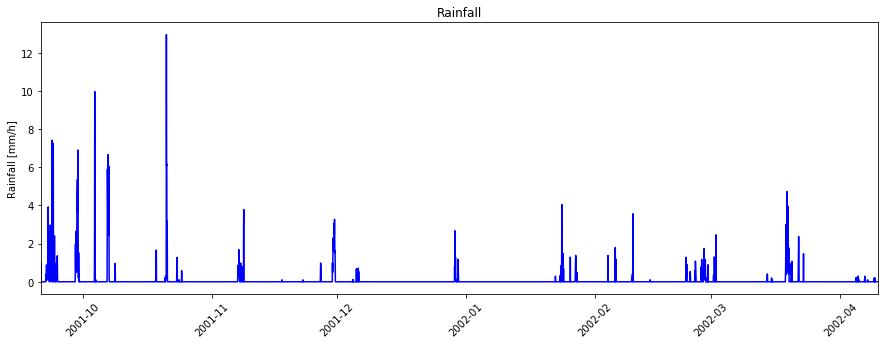

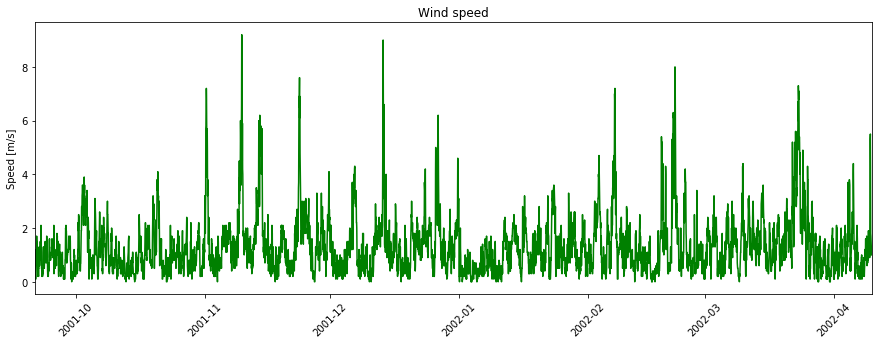

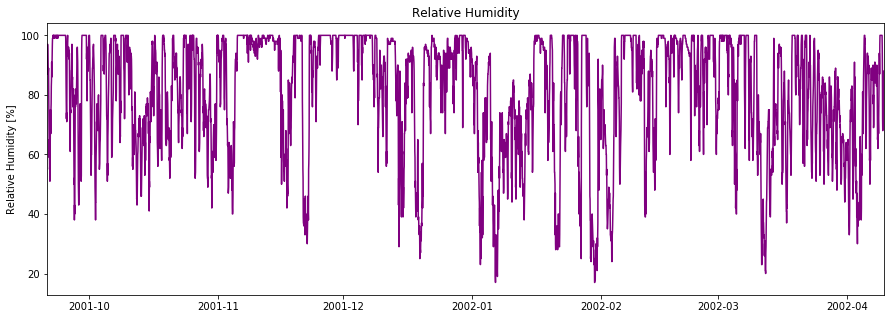

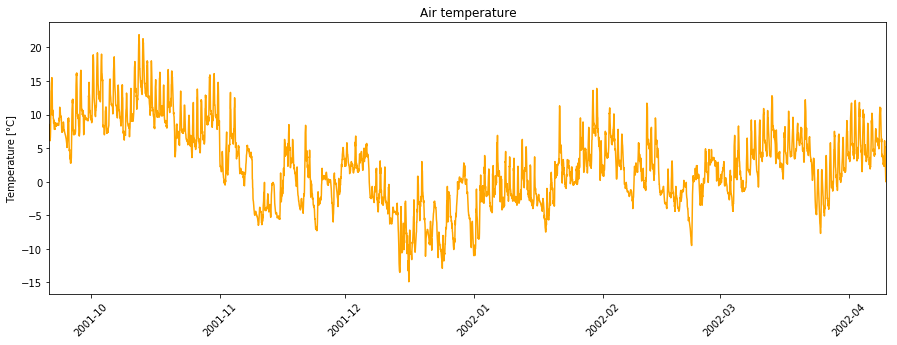

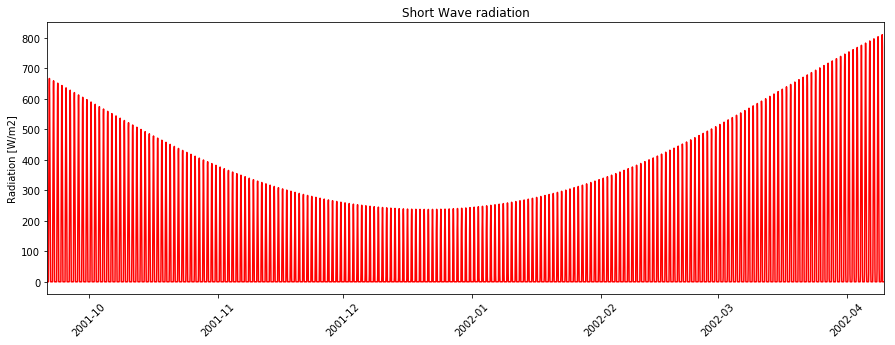

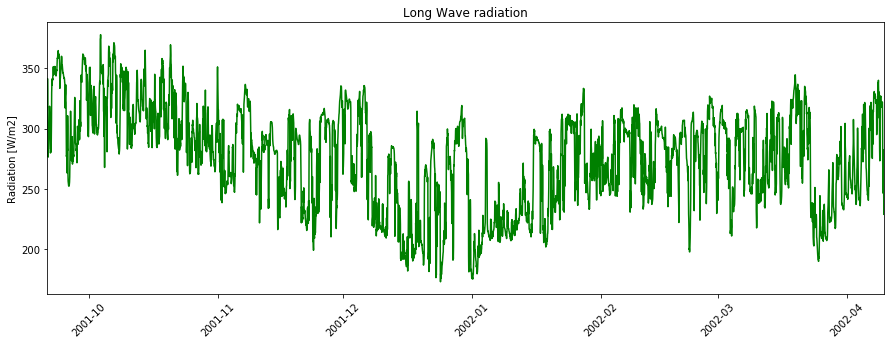

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["Prec"], color = 'blue')
plt.xticks(rotation=45)
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Rainfall")
plt.ylabel("Rainfall [mm/h]")
plt.savefig("Prec.png")
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["Ws"], color = 'green')
plt.xticks(rotation=45)
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Wind speed")
plt.ylabel("Speed [m/s]")
plt.savefig("Ws.png")
plt.show()

# fig, ax = plt.subplots(figsize=(15, 5))
# plt.plot(dataset.index, dataset["Wd"])
# plt.xlim(dataset.index.min(), dataset.index.max())
# plt.title("Wind direction")
# plt.ylabel("Direction [°]")
# plt.savefig("Wd.png")
# plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["RH"], color = 'purple')
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Relative Humidity")
plt.ylabel("Relative Humidity [%]")
plt.savefig("RH.png")
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["Tair"], color = 'orange')
plt.xticks(rotation=45)
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Air temperature")
plt.ylabel("Temperature [°C]")
plt.savefig("Tair.png")
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["SW"], color = 'red')
plt.xticks(rotation=45)
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Short Wave radiation")
plt.ylabel("Radiation [W/m2]")
plt.savefig("SW.png")
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(dataset.index, dataset["LW"], color = 'green')
plt.xticks(rotation=45)
plt.xlim(dataset.index.min(), dataset.index.max())
plt.title("Long Wave radiation")
plt.ylabel("Radiation [W/m2]")
plt.savefig("LW.png")
plt.show()


## Change time format

In [16]:
# dataset.index = dataset.index.strftime("%d/%m/%Y %H:%M")

# print("len(dataset) = ", len(dataset))
# print("start = ", dataset.index.min())
# print("end   = ", dataset.index.max())
# dataset.tail()

## Save output to file

In [17]:
# meteo_file = dataset.to_csv("meteo0001.txt", sep=',',index=True, index_label='Date')